In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/gustavo/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['amax', 'step', 'rc', 'amin', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import argparse
import tqdm

In [17]:
# Constants, definitions and units

global MP, ME, CL, GNEWT, KBOL, SIGMA_THOMSON, MSUN, LSUN, YEAR, MBH
global TPTE_DISK, TPTE_JET, THETAE_MAX
global M_unit, L_unit, T_unit, RHO_unit, U_unit, B_unit, Ne_unit

# all constants in cgs units
ME = 9.1093826e-28 # electron mass
MP = 1.67262171e-24 # proton mass
CL = 2.99792458e10 # speed of light
GNEWT = 6.6742e-8 # gravitational constant
KBOL = 1.3806505e-16 # Boltzmann constant
SIGMA_THOMSON = 0.665245873e-24 # Thomson cross-section
MSUN = 1.989e33 # solar mass
LSUN = 3.827e33 # solar luminosity
YEAR = 31536000 # seconds in a year

# temperature and beta-prescription (Mościbrodzka 2016)
TPTE_DISK = 20. # R_high
TPTE_JET = 1. # R_low
THETAE_MAX = 1000.
TP_OVER_TE = 100.0

# grmonty units and BH mass
#MBH = 4.5e6 * MSUN # Sgr A*
#MBH = 6.2e9 * MSUN # M87
MBH = 5.0e9 * MSUN
#MBH = 10.0 * MSUN
M_unit = 3.0e29
#M_unit = 2.0*10e11
L_unit = GNEWT * MBH / (CL * CL)
T_unit = L_unit / CL
RHO_unit = M_unit / (L_unit*L_unit*L_unit)
U_unit = RHO_unit * CL * CL
B_unit = CL * np.sqrt(4. * np.pi * RHO_unit)
Ne_unit = RHO_unit / (MP + ME)

In [18]:
%run -i harm_script2.py

In [19]:
rg("gdump")

In [20]:
rd("dump000")

In [21]:
sigmaphi = bu[3]*bd[3]/(rho)
bphi = bu[3]*B_unit
Bphi = B[3]*B_unit
jcurr = np.nan_to_num(jcurr)
sigma = (bu[0]*bd[0] + bu[1]*bd[1] + bu[2]*bd[2] + bu[3]*bd[3])/rho

sigma2d = sigma[:,:,0]
r2d = (r*np.sin(h))[:,:,0]
z2d = (r*np.cos(h))[:,:,0]

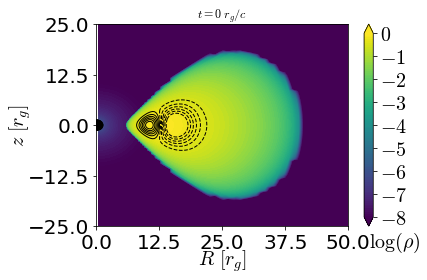

In [23]:
xmax = 50
ymax = xmax/2
step = xmax/4

hfont = {'fontname':'Helvetica'}
aphi=psicalc()
amax = aphi.max()
cs, cb = plco(np.log10(rho),levels=np.linspace(-8,0,100),isfilled=1,k=0,xy=1,xmax=xmax,ymax=ymax,dobh=1,cb=1,extend="both",pretty=1)
#cs, cb = plco(bu[3]*B_unit, levels = np.linspace(-0.1, 0.1, 100), isfilled=1, k=0, xy=1, xmax=80, ymax=40, dobh=1, cb=1, extend = "both", pretty=1, cmap = 'RdBu')
#plt.contour(r2d, z2d, sigma2d, levels=[1], colors=('black'), linestyles=('-.'), linewidths=(2))
ax = plt.gca()
ax.set_xlabel(r"$R\ [r_g]$",fontsize=20,labelpad=-5, **hfont)
ax.set_ylabel(r"$z\ [r_g]$",fontsize=20,labelpad=-5, **hfont)
cb.ax.set_xlabel(r"$\log(\rho)$",fontsize=20,ha="left")
plt.xticks(np.arange(0, xmax+1, step=step), **hfont) #GS
plt.yticks(np.arange(-ymax, ymax+1, step=step), **hfont) #GS
circle1 = plt.Circle((0, 0), Rin, color='black') # GS
fig = plt.gcf() # GS
ax2 = fig.gca() # GS
ax2.add_artist(circle1) # GS
plc(aphi,levels=np.linspace(-amax,amax,14)[1:-1],colors="black",linewidths=1,xy=-1)
plt.title(r"$t=%.4g$"%np.round(t)+r"$\;r_g/c$", **hfont); 
plt.tight_layout() # GS
plt.draw()
#plt.savefig("rho000_2ds9.png", dpi = 300)